C:\Users\vsharm29\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


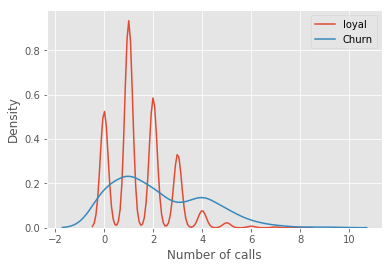

In [9]:
import pandas as pd 
from matplotlib import pyplot as plt 
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=10,6
import seaborn as sns
%matplotlib inline

telecom_data=pd.read_csv('../practical/telecom_churn.csv')


fig=sns.kdeplot(telecom_data[telecom_data['Churn']==False]['Customer service calls'], label='loyal')
fig = sns.kdeplot(telecom_data[telecom_data['Churn']==True]['Customer service calls'], label='Churn')
fig.set(xlabel='Number of calls', ylabel='Density')
plt.show();

In [11]:
import numpy as np
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples= data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries= np.percentile (stat,[100*alpha/2.,100 * (1-alpha/2.)])
    return boundaries
    
loyal_calls= telecom_data[telecom_data['Churn']==False]['Customer service calls'].values
churn_calls= telecom_data[telecom_data['Churn']==True]['Customer service calls'].values

np.random.seed(0)

loyal_mean_scores=[np.mean(sample) for sample in get_bootstrap_samples(loyal_calls,1000)]

churn_mean_scores=[np.mean(sample) for sample in get_bootstrap_samples(churn_calls,1000)]

print("Service calls from loyal: mean interval", stat_intervals(loyal_mean_scores,0.05))

print("Service calls from churn: mean interval", stat_intervals(churn_mean_scores,0.05))




# source https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging



Service calls from loyal: mean interval [1.4077193  1.49473684]
Service calls from churn: mean interval [2.0621118  2.39761905]
